In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Grids (Pairplot vs PairGrid vs FacetGrid)

Esta parte é bem simples e de certa forma é considerada mais avançada, mas não vai ser nada de mais para o que já vimos anteriormente.

O **pairplot** já vimos anteriormente. Vou antes carregar o dataset tips novamente

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


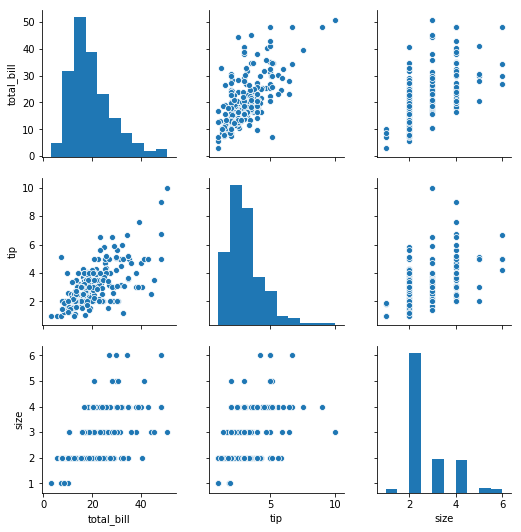

In [4]:
#lembre-se que passamos o dataframe inteiro
sns.pairplot(tips)

O pairplot pega toda coluna numérica e faz um produto cartesiano. Podemos brincar um pouco com o pairplot, agora que já vimos coisas como o **hue**

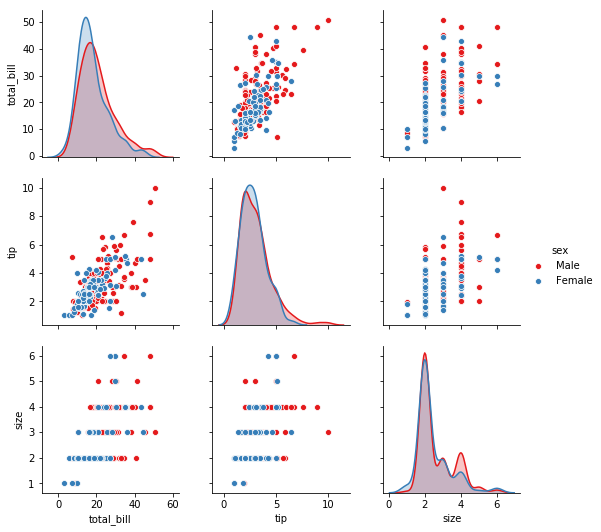

In [7]:
sns.pairplot(tips,hue='sex',palette='Set1')

#É claro, aqui poderíamos usar set_context, plt.legend para customizar ainda mais.
#mas vamos focar nas ideias aqui. Já estudamos customização.

#### Fazer um pairplot pode não ser uma ideia muito boa. Aqui é um dataset pequeno, só com 3 colunas numéricas. Mas imagine se fosse algo com 200 colunas numéricas? Seria um caos visualizar algo assim e muitas vezes um pairplot não nos ajuda muito. É só algo para se fazer talvez no fim de um projeto, ou quando se tiver poucos dados e poucas colunas numéricas...pode até servir para dar um norte ao profissional.


#### Copiando do notebook 3:

"O pairplot pega toda coluna numérica do nosso dataframe e relaciona cada um deles. Mostrando um histograma quando o eixo X e Y são iguais e um gráfico de dispersão quando diferentes.


pairplot é um plot que muitas vezes é "inútil". Muitas vezes ele não nos mostra nenhuma informação relevante, além de não ser bom de utilizar quando tivermos muitas colunas numéricas (porque demoraria muito para processar, além de ficarmos com um plot gigantesco)."

## PairGrid

Com o PairGrid, nós conseguimos pegar a ideia do pairplot e ter mais controle sobre ele.

O pairplot é uma versão simplificada do PairGrid. pairplot faz um monte de coisa automaticamente, no PairGrid você tem que fazer mais do que chamar um método no dataframe, mas lhe dá mais controle sobre o que está acontecendo.

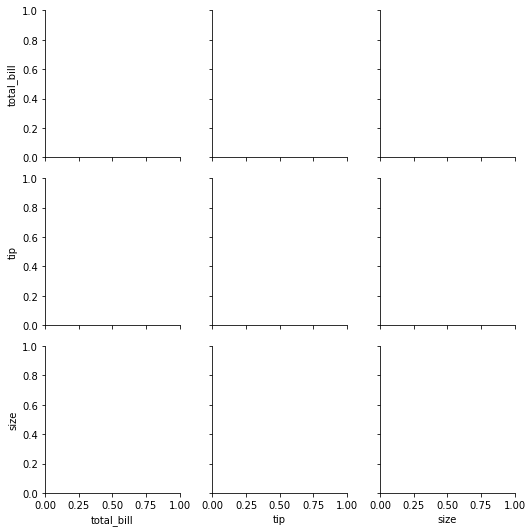

In [8]:
#demonstrando
sns.PairGrid(tips)

Note que nós apenas temos um monte de espaços vazios sem nenhum plot presente.

Algo comum de se fazer é criar um **g** igual a expressão acima e trabalhar em cima desse g.

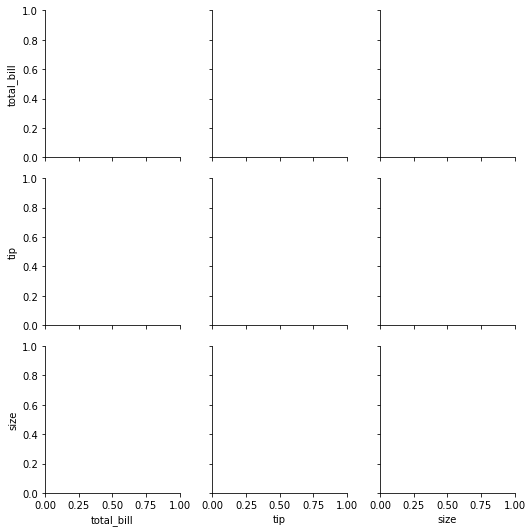

In [10]:
g = sns.PairGrid(tips)

Uma das coisas que podemos fazer é chamar o método **map** nesse objeto acima. E para o map, passamos o que queremos que apareça em cada "canvas"(cada figura vazia) desse.

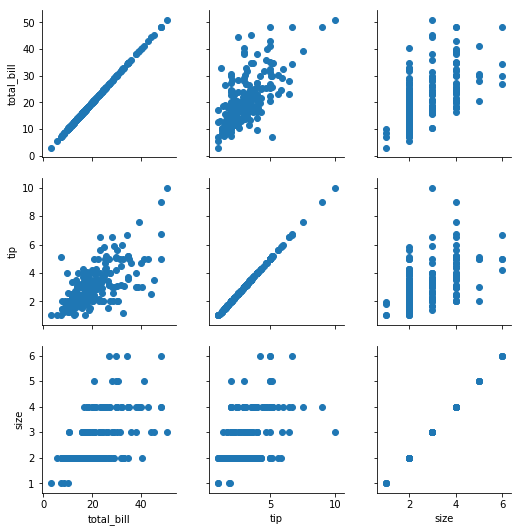

In [12]:
g = sns.PairGrid(tips)
g.map(plt.scatter) #quero que faça um scatterplot(gráfico de dispersão) em cada espaço.

Também podemos ser mais específicos e especificar o que queremos que apareça na diagonal principal, acima da diagonal principal e abaixo da diagonal principal.

Note que na diagonal principal sempre teremos variáveis se comparando com elas mesmas.

diagonal principal -> **map_diag**

acima da diagonal principal -> **map_upper**

abaixo da diagonal principal -> **map_lower**


Na diagonal principal, faz sentido que nós coloquemos algum plot que apenas depende de uma variável.

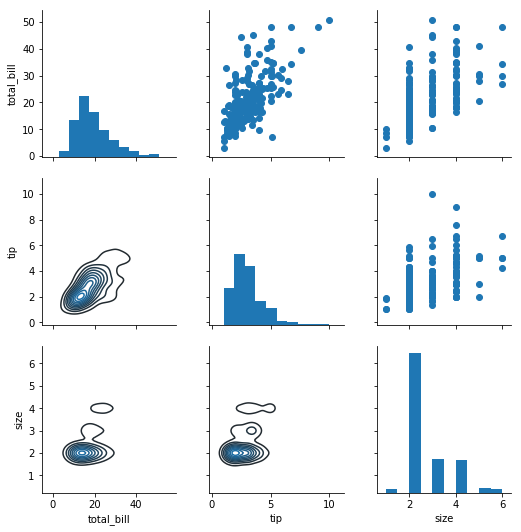

In [15]:
g = sns.PairGrid(tips)
g.map_diag(plt.hist) #faz sentido, apenas precisa de uma variável (histograma)
g.map_upper(plt.scatter) #fazer um gráfico de dispersão acima da diagonal principal
g.map_lower(sns.kdeplot) #fazer um "KDE de 2 variáveis" abaixo da diagonal principal

Vamos parar por aqui. Mas há como customizar muito mais o PairGrid, colocando **hue**, legendas e chamando outros métodos. Se for de seu interesse, basta pesquisar, a ideia toda já está contida aqui

Pessoalmente eu uso mais o pairplot por ser mais simples e pelo fato de me dar a informação que eu quero. Mas eu sei que se quiser algo mais customizável, posso recorrer ao PairGrid.

## FacetGrid

Muito parecido com quando estudamos **subplots no Matplotlib**. Mas agora, ao invés de passarmos o número de linhas e colunas, passamos as colunas do nosso dataframe que vão representar as linhas e colunas.

Vamos entender isso jajá com um exemplo.

In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Vamos chamar um **g**, do mesmo jeito que fizemos para o PairGrid, e nele passaremos o dataframe e parâmetros que definem as linhas e colunas.

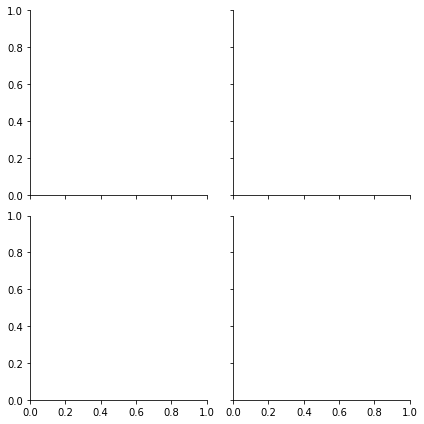

In [19]:
g = sns.FacetGrid(tips,row='smoker',col='sex')

Interessante. O FacetGrid criou para nós uma Grid(esse conjunto de quadros vazios) em que cada linha e coluna representa um valor das colunas que passamos.

Nesse caso, as linhas representam se uma pessoa fuma ou não. As colunas representam o sexo da pessoa.

Similarmente, possuímos um método **map**, que faz exatamente a mesma coisa de antes. Porém, agora que não é óbvio em qual variável fazemos os nosso cálculos, temos que passar as variáveis em seguida.

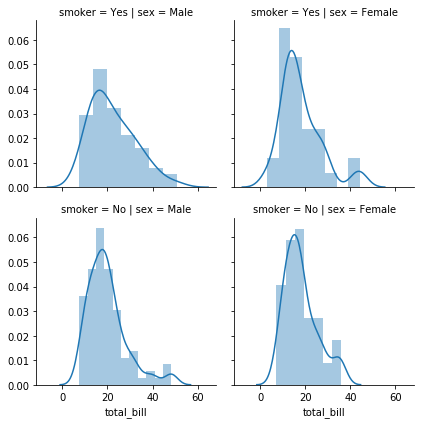

In [20]:
g = sns.FacetGrid(tips,row='smoker',col='sex')
g.map(sns.distplot,'total_bill') #para cada caso, faça um distplot na conta(total_bill)

#### Note que no código passamos a função do plot (distplot) e logo depois passamos a variável que vamos analisar. No caso do distplot, é apenas uma variável. Se fosse algo como um scatterplot(gráfico de dispersão), teríamos que mandar mais outra variável da mesma forma.

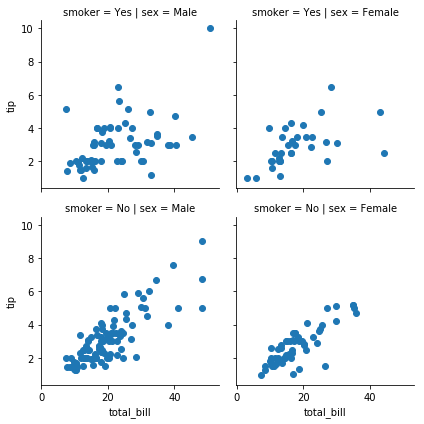

In [21]:
g = sns.FacetGrid(tips,row='smoker',col='sex')
g.map(plt.scatter,'total_bill','tip') 

Note também todo o texto que foi adicionado nos plots assim que nós usamos o método **map**. Note que o seaborn nos sinaliza o que cada plot significa.

Exemplo: smoker = No | sex = Male

Esse plot só leva em consideração os não-fumantes do sexo masculino

# Alguns plots, que não vimos aqui, como o Regression Plot, possuem parâmetros que já fazem um FacetGrid automaticamente para nós.

## Regression Plots (não precisa entender)

O Seaborn pode lidar muito bem com regressões, mas na realidade é muito raro vermos alguém utilizar o Seaborn para isso. Vou mostrar um pouquinho do linear model plot (lmplot), mas não é necessário entender o que está acontecendo plenamente, porque está fora de nosso escopo.

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


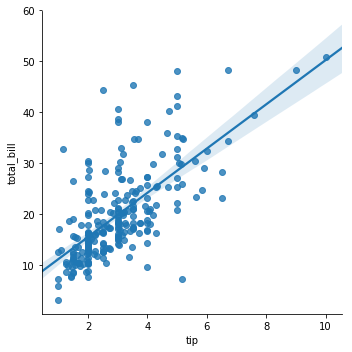

In [22]:
sns.lmplot(x='tip',y='total_bill',data=tips) #padrão familiar para nós

Essa "sombra" em torno da reta é o nosso *erro*. Ele aumenta conforme há menos pontos para se basear para fazer a regressão linear. Note como essa área de erro vai aumentar daqui pra frente pela ausência de pontos.

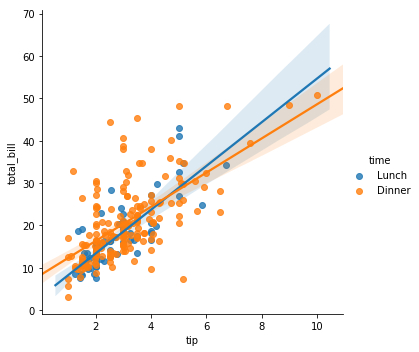

In [23]:
sns.lmplot(x='tip',y='total_bill',data=tips,hue='time') #chamando hue em 'time', que é uma coluna do tips
#'time' é uma coluna categórica do tips que nós ignoramos até agora, mas pode verificar lá em cima quando
#chamamos tips.head()

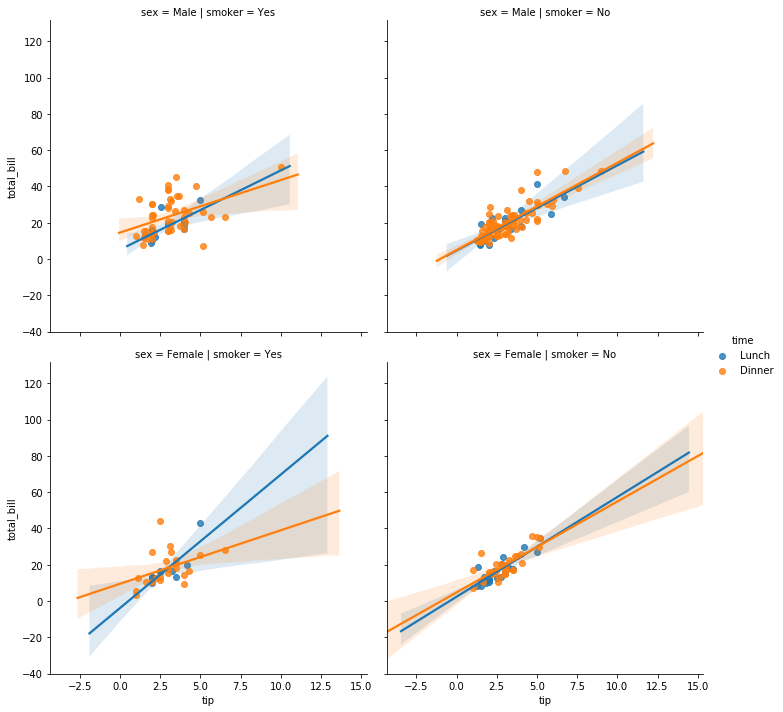

In [24]:
sns.lmplot(x='tip',y='total_bill',data=tips,hue='time', col='smoker',row='sex')

### Note como essa última linha de código se assemelha ao FacetGrid. É porque no fundo está sendo criado um FacetGrid.